## Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("TransformedData.csv", parse_dates=True)
df

,Longitude,Latitude,Area,Width,Length,Land Type,Legal Status,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price,Category_Encoded,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,1.043124,4,6,8.0,0.000000,0.000000,0.000000,0.0,-1.936195,0.0,1,0,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.373858,4,5,6.0,0.000000,0.000000,0.000000,0.0,-1.897805,0.0,1,0,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.373858,4,5,4.0,0.000000,0.000000,0.000000,0.0,-1.897805,0.0,0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-0.741584,4,6,4.0,0.000000,0.000000,0.000000,0.0,-1.884256,0.0,0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.604743,1,1,5.0,0.000000,0.000000,0.000000,0.0,-1.823284,0.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,10.402008,3.999048,10.000000,2.236068,0.373858,0,1,3.0,1.000000,1.414214,1.000000,2.0,-0.723524,1.0,0,0,0,0,0,0
13210,10.403705,4.009104,6.542163,2.236068,-2.178278,0,1,5.0,1.000000,1.414214,1.000000,1.0,-0.475119,1.0,0,0,0,0,0,0
13211,10.402316,3.998903,10.862780,2.236068,1.154668,0,1,2.0,1.000000,1.414214,1.414214,2.0,-0.389306,1.0,0,0,0,0,0,0
13212,10.403318,4.002008,10.000000,2.236068,0.373858,0,1,5.0,1.000000,1.414214,1.414214,2.0,0.066857,1.0,0,0,0,0,0,0


In [3]:
features = ["Category_Encoded", "Longitude", "Latitude", "Area", "Width", "Length", "Land Type", "House Direction", "Legal Status", "Floors", "Rooms", "Toilets"]
X = df[features]
y = df["Price"]

### Data Visualization

#### Relationship of Target Variable to Input Variables

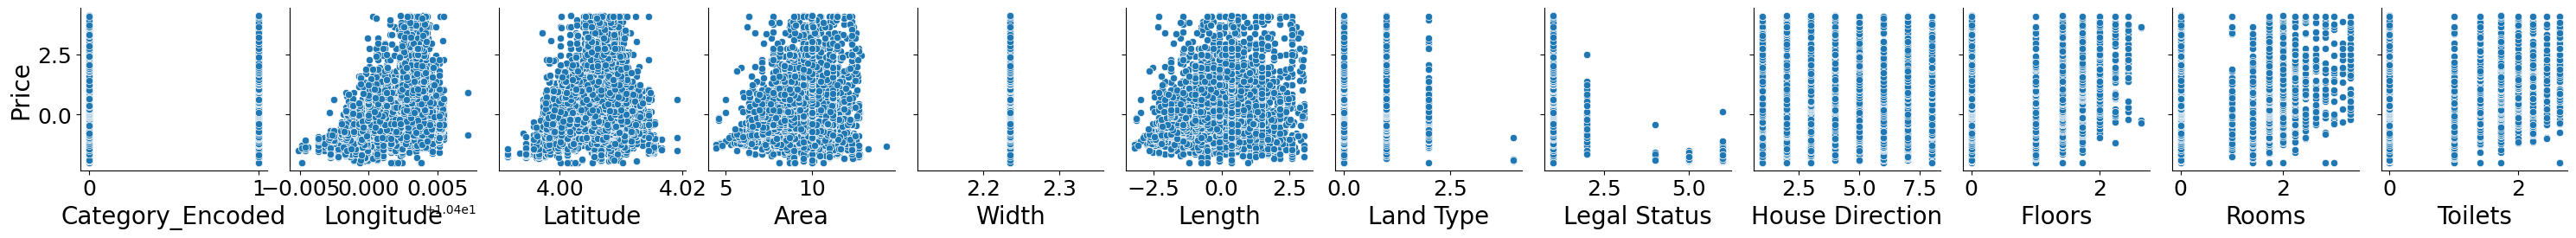

In [4]:
features = ["Category_Encoded", "Longitude", "Latitude", "Area", "Width", "Length", "Land Type",	"Legal Status", "House Direction", "Floors", "Rooms", "Toilets"]

pairplt_trans = sns.pairplot(df, x_vars=features, y_vars=["Price"])

for ax in pairplt_trans.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18) 

plt.show()

#### Comment
 - In the graph `Price & Area`, the points have a slight upward trend in distribution (positive correlation). 
 - The remaining features have a clear scatter distribution. 
 - There are some features that are concentrated at certain points
#### Conclusion
 - Weak correlation: Only `Price` and `Area` have a slight increasing trend, indicating that there may be a weak positive correlation.
 - Other variables have no clear correlation: `Longitude, Latitude, Width, Length` have no specific pattern, and are distributed quite randomly.
 - There are clusters of data at some points: Some variables have concentrated points, possibly because the data is limited to some ranges or is influenced by other factors such as location, property type.

#### Using HeatMap to Represent Correlation of Input Variable Pairs

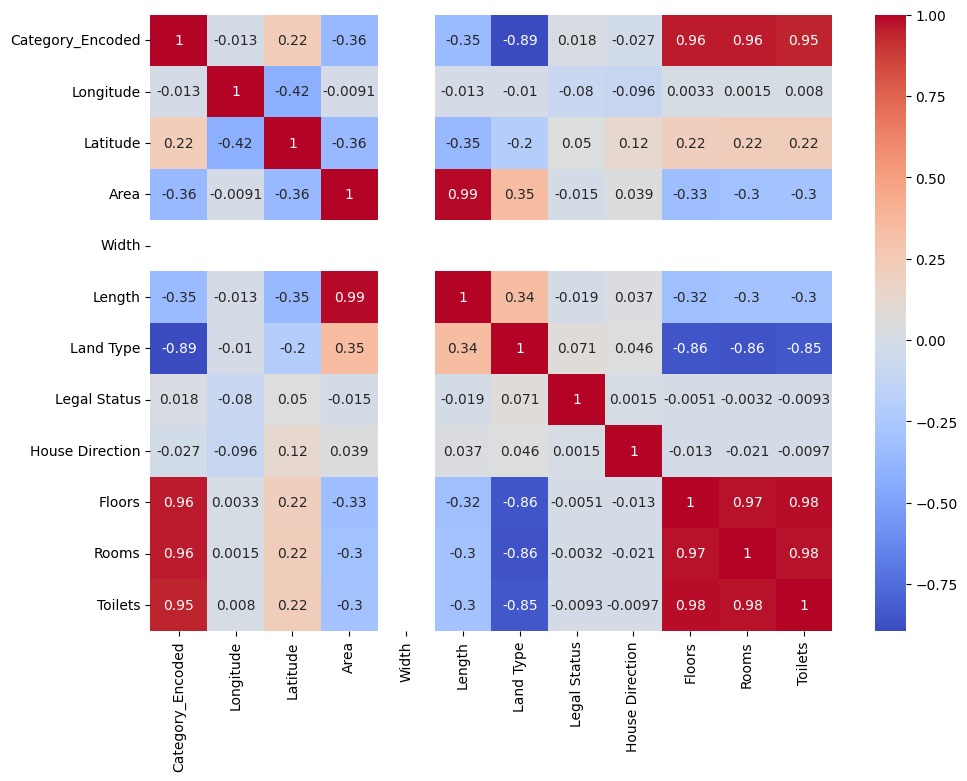

In [5]:
cols_to_include = ["Category_Encoded", "Longitude", "Latitude", "Area", "Width", "Length", "Land Type",	"Legal Status", "House Direction", "Floors", "Rooms", "Toilets"]
plt.figure(figsize=(11, 8))
sns.heatmap(df[cols_to_include].corr(), annot=True, cmap="coolwarm")

plt.show()

#### Using ScatterPlot to represent the relationship between 2 variables `Length` and `Area`

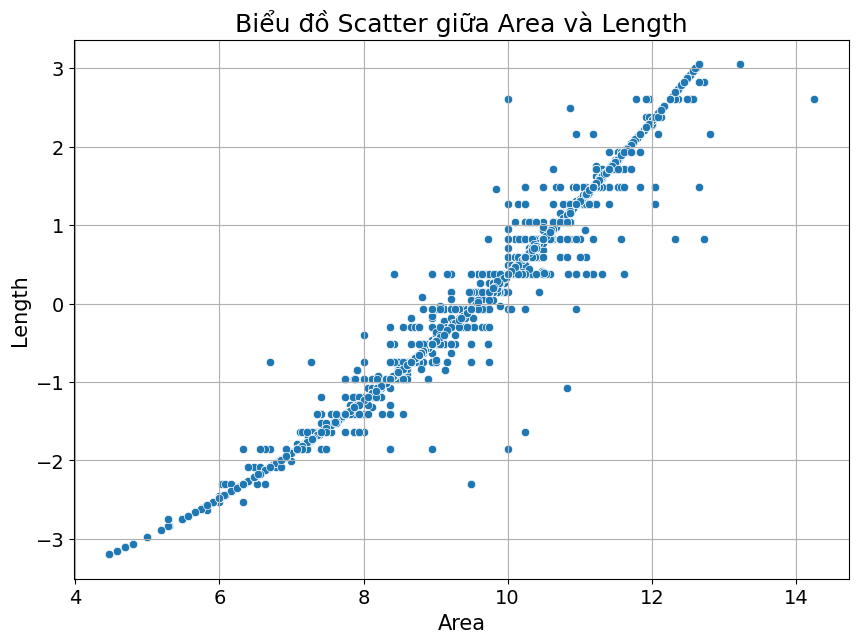

In [6]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Area', y='Length', data=df)
plt.title('Biểu đồ Scatter giữa Area và Length', fontsize=18)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Length', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

#### Comments
 - Based on the two graphs above, we see that the input variables are almost independent and do not depend on each other. Only the variables Length and Area have the most obvious correlation with each other (>0.8) according to Heatmap. 
 - At the same time, through ScatterPlot, the points tend to be distributed in an upward straight line (positive correlation).
#### Conclusion
It can be said that the higher the Length value, the larger the Area value and vice versa. 
In the future, one of these two variables can be eliminated to reduce overfitting of the model

### Statistical methods
#### Univariate feature selection

In [7]:
selector_best = SelectKBest(score_func=mutual_info_regression, k=12)
X_kbest = selector_best.fit_transform(X, y)
selected_features = X.columns[selector_best.get_support()]
scores = selector_best.scores_

sorted_indices = np.argsort(scores)[::-1]

print("Selected features in order from best to worst:")
for index in sorted_indices:
  print(f"{selected_features[index]}: {scores[index]}")

Selected features in order from best to worst:
Longitude: 1.1920311924995923
Latitude: 1.169213489530338
Area: 0.49366093123004884
Length: 0.4347357311335296
Toilets: 0.22332204850751758
Rooms: 0.2019428332880393
Floors: 0.19141474337461828
Land Type: 0.1122698460331244
Category_Encoded: 0.08384092362034323
House Direction: 0.06766284845633397
Legal Status: 0.022911441994539317
Width: 0.0037334264702897357


##### Conclusion:
For statistical methods, by using the application of univariate statistical testing, it is possible to arrange the order of variables from most important to least important. The Longitude variable is considered the most important variable among the input variables.


### Recursive feature elimination
#### Recursive feature elimination with cross-validation

In [8]:
min_features_to_select = 1
regressor = LinearRegression()

cv = KFold(n_splits=5)

rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Optimal number of features: 12
Selected features: Index(['Category_Encoded', 'Longitude', 'Latitude', 'Area', 'Width', 'Length',
       'Land Type', 'House Direction', 'Legal Status', 'Floors', 'Rooms',
       'Toilets'],
      dtype='object')


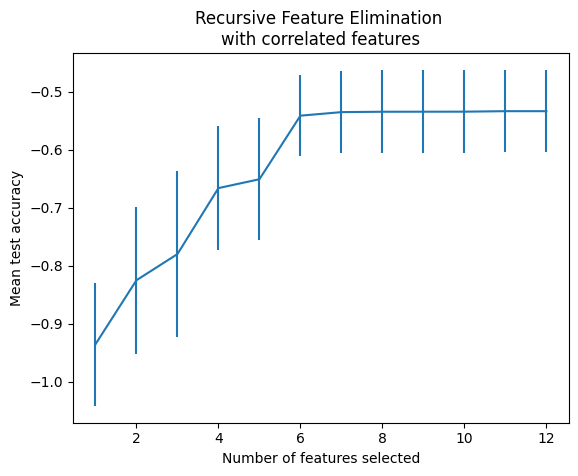

In [9]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

### Conclusion

#### Comments on the results

- Optimal number of features: 8. The results show that the model performs best when keeping all 8 features. That is, removing any of these 8 columns causes the model to degrade (higher MSE).

- Selected features: `Longitude`, `Latitude`, `Area`, `Length`, `Floors`, `Toilets`, `Category_Encoded`. These are the 8 selected features. If X initially has exactly these 8 columns, it proves that all are important for prediction. If X has more columns, then the results show that these 8 columns are the best according to the neg_mean_squared_error criterion.

#### From the graph

- The curve (mean_test_score) shows how the model improves or deteriorates when the number of features is gradually reduced.
- The error bars (yerr) show the variation over the cross-validation runs.

- The highest point of the curve corresponds to the selection of 8 features.

#### Conclusion
- The LinearRegression model with the above 8 features is the most optimal according to the MSE evaluation during the recursive feature elimination (RFECV) process.

- If your goal is to optimize the number of features (feature selection), the results show that keeping 8 features is the best performance.

- In case you expect to remove some features while maintaining the same performance, this result shows that the model probably needs all 8 columns to perform well.